In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from tqdm import notebook

In [3]:
path_to_edge_list = "./edge_list.txt"

In [4]:
G = nx.Graph()
with open(path_to_edge_list, "r") as edge_list:
    edges = []
    for line in edge_list:
        edges.append(tuple(map(int, line.split())))
G.add_edges_from(edges)

In [5]:
mapping = {prev_idx: idx for idx, prev_idx in enumerate(G.nodes)}

In [6]:
G = nx.relabel_nodes(G, mapping)

In [7]:
len(G)

3953

In [9]:
for node in G.nodes:
    G.nodes[node]["status"] = "not affected"

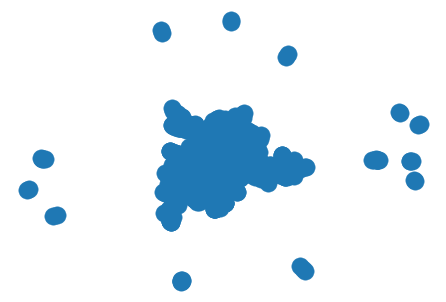

In [10]:
nx.draw_spring(G)

In [24]:
mapping[377]

1944

In [25]:
comms = [comm for comm in nx.connected_components(G) if 1944 in comm]

In [28]:
len(comms[0])

3732

In [29]:
ultra_cool_nodes = comms[0]

In [12]:
# cum_sum = 0
# ultra_cool_nodes = []
# for idx, comm in enumerate(comms):
#     if idx < 5:
#         ultra_cool_nodes.extend(list(comms[idx]))
#     cum_sum += len(comms[idx])
#     print(idx, len(comms[idx]), cum_sum)

0 759 759
1 508 1267
2 505 1772
3 469 2241
4 327 2568
5 267 2835
6 231 3066
7 221 3287
8 180 3467
9 158 3625
10 108 3733
11 45 3778
12 28 3806
13 25 3831
14 23 3854
15 18 3872
16 10 3882
17 10 3892
18 9 3901
19 8 3909
20 6 3915
21 6 3921
22 4 3925
23 3 3928
24 3 3931
25 3 3934
26 3 3937
27 2 3939
28 2 3941
29 2 3943
30 2 3945
31 2 3947
32 2 3949
33 2 3951
34 2 3953


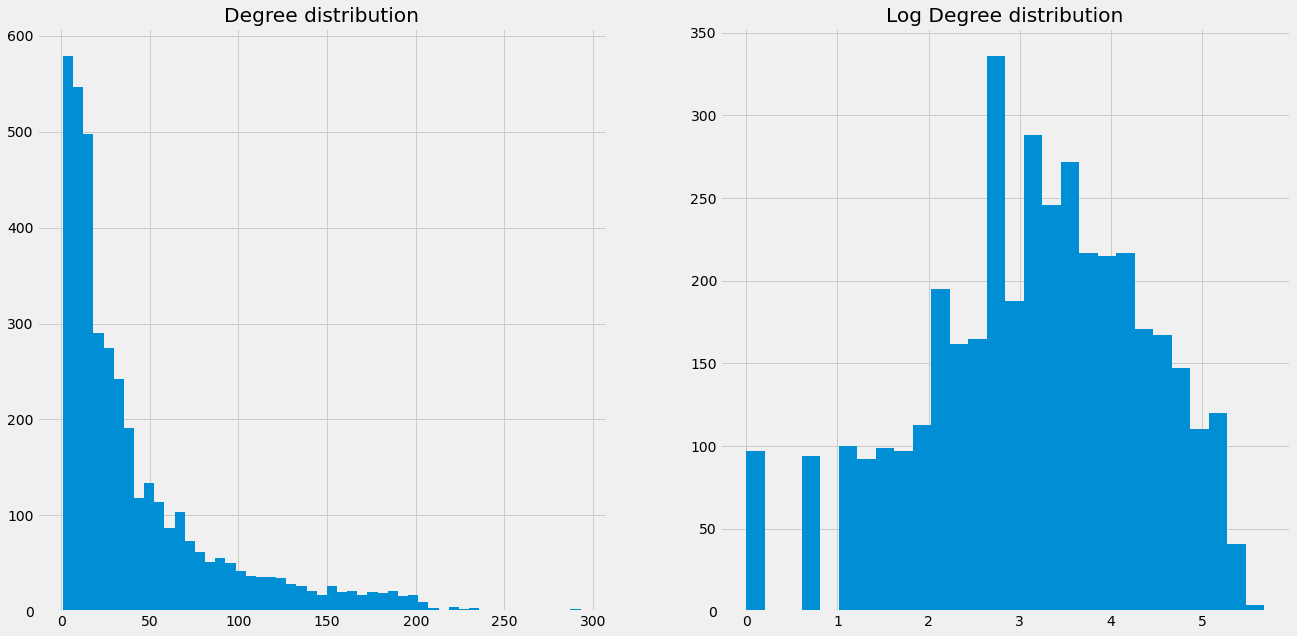

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].hist(list(dict(G.degree).values()), bins="auto")
ax[0].set_title("Degree distribution")
ax[1].hist(np.log(list(dict(G.degree).values())), bins="auto")
ax[1].set_title("Log Degree distribution")
plt.draw()

In [14]:
nx.algorithms.assortativity.degree_assortativity_coefficient(G)

0.6308640875493834

In [31]:
BUDGET = 10000
CONTRACT_COST_BY_ONE_NEIGHBOR = 300
INCOME_PER_PERSON = 50
EXPOSURE_THRESHOLD = 0.18
CONTRACT_LIMIT_PER_DAY = 10
DAY_LIMIT = 60

thresholds = [EXPOSURE_THRESHOLD for _ in range(len(G))]

In [12]:
# def linear_threshold(G, active_nodes, thresholds):
#     # YOUR CODE HERE
#     # raise NotImplementedError()
#     result =[active_nodes]
#     current_active_nodes = active_nodes.copy()
#     while True:
#         active_nodes = current_active_nodes.copy()
#         for n in G.nodes:
#             if current_active_nodes[n] != 1:
#                 neighbors = [i for i in G.neighbors(n)]
#                 if  np.sum(active_nodes[neighbors])/len(neighbors) >= thresholds[n]:
#                     current_active_nodes[n] = 1
#         result.append(current_active_nodes.copy())
#         if np.all(active_nodes == current_active_nodes):
#             break
#     return np.array(result)

# def greedy_influence_max(G, thresholds, k):
#     A = set()
#     active_nodes = np.zeros(len(G))
#     while np.sum(active_nodes) < k:
#         max_influence = 0
#         best_node = None
#         for n in G.nodes:
#             if n not in A:
#                 current_active_nodes = active_nodes.copy()
#                 current_active_nodes[n] = 1
#                 influence = np.sum(linear_threshold(G, current_active_nodes, thresholds)[:,-1])
#                 if max_influence < influence:
#                     max_influence = influence
#                     best_node = n
#         A.add(best_node)
#         active_nodes[list(A)] = 1
#     return active_nodes

In [72]:
G.degree[1237]

57

In [70]:
G.degree[3952]

1

In [32]:
from collections import defaultdict

In [33]:
degree_dict = defaultdict(set)
for node, deg in G.degree:
    degree_dict[deg].add(node)

In [168]:
G = deepcopy(G_copy)
node_with_cool_neighbor = defaultdict(set)
for node in ultra_cool_nodes:
    try:
        max_deg_by_cond = max([G.degree(n) for n in G.neighbors(node)])
        if max_deg_by_cond / G.degree[node] >= 5 and (G.degree[node] * CONTRACT_COST_BY_ONE_NEIGHBOR <= 10000):
            node_with_cool_neighbor[max_deg_by_cond].add(node)
    except ValueError as e:
        continue

In [169]:
s = 0
for node in node_with_cool_neighbor[30]:
    s += G.degree(node)
    print(node, G.degree(node))

3840 5
3841 5
3842 1
3843 1
3364 3
3844 3
3721 5
3403 4
2731 2
1774 2
150 2
3838 6


In [170]:
node_with_cool_neighbor

defaultdict(set,
            {68: {2,
              11,
              149,
              165,
              173,
              174,
              175,
              176,
              183,
              244,
              245,
              246,
              1508,
              1561,
              2758},
             75: {17,
              43,
              50,
              76,
              92,
              94,
              120,
              1536,
              1689,
              1906,
              2388,
              2635,
              2720,
              2766,
              3445,
              3806},
             64: {20,
              77,
              87,
              136,
              162,
              164,
              172,
              207,
              235,
              240,
              241,
              243,
              399,
              1238,
              1525,
              3287,
              3620,
              3622},
             72: {26, 30, 78, 12

In [84]:
G.degree[997]

1

In [85]:
G.degree[1308]

1

In [86]:
G.degree[2680]

1

In [34]:
def affect_nodes(G, nodes_to_affect):
    money = INCOME_PER_PERSON * len(nodes_to_affect)
    for node in nodes_to_affect:
        G.nodes[node]["status"] = "affected"
    return money

def get_amount_of_affected_nodes(G, node):
    neighbors = list(G.neighbors(node))
    amount = sum([1 if G.nodes[neigh]["status"] == "affected" else 0 for neigh in neighbors])
    return amount, len(neighbors)

In [35]:
# from copy import deepcopy
# G_copy = deepcopy(G)

In [73]:
len(degree_dict[1])

97

In [210]:
for node in history[0]:
    for idx, comm in enumerate(comms):
        if node in comm:
            print(node, idx)

1918 5
1920 5
2882 14
1870 0
3858 2
460 4


In [114]:
mapping[167]

387

In [115]:
mapping[3057]

1782

In [116]:
mapping[3775]

3706

In [141]:
len(node_with_cool_neighbor[30])

22

In [148]:
list(node_with_cool_neighbor[30])[:10]

[3840, 3841, 3842, 3843, 3844, 3721, 3345, 150, 3364, 2731]

In [149]:
list(node_with_cool_neighbor[30])[10:21]

[1709, 182, 1602, 2628, 3403, 2636, 3800, 2662, 2666, 2667, 1774]

In [150]:
list(node_with_cool_neighbor[30])[21:]

[3838]

In [151]:
to_affect = [[3840, 3841, 3842, 3843, 3844, 3721, 3345, 150, 3364, 2731], [1709, 182, 1602, 2628, 3403, 2636, 3800, 2662, 2666, 2667, 1774], [3838]]

In [167]:
# day: [vertices]
G = deepcopy(G_copy)
history = defaultdict(list)
history[0].extend([150, 387, 1782, 3706])
for node in history[0]:
    G.nodes[node]["status"] = "affected"
# max_money = 0
affected = set(history[0])
morning_money = [BUDGET]
evening_money = [BUDGET - sum([CONTRACT_COST_BY_ONE_NEIGHBOR * G.degree(node) for node in history[0]])]
for cur_day in notebook.tqdm(range(1, DAY_LIMIT)):
    cur_affected_nodes = set()
    for node in ultra_cool_nodes:
        aff, neigh = get_amount_of_affected_nodes(G, node)
        if G.nodes[node]["status"] == "not affected" and aff / neigh >= 0.18:
            cur_affected_nodes.add(node)
    morning_money.append(evening_money[cur_day - 1] + affect_nodes(G, list(cur_affected_nodes - set(history[cur_day - 1]))))
    print(f"morning money {morning_money[-1]}")
    cur_contract_nodes = {} # node: highest_neighbor_degree
#     if morning_money[-1] <= evening_money[-1]:
#         for node in ultra_cool_nodes:
#             if G.nodes[node]["status"] == "not affected" and morning_money[cur_day] // CONTRACT_COST_BY_ONE_NEIGHBOR >= G.degree(node):
#     #             tmp_max_degree_node = None
#     #             tmp_max_degree = -1
#                 max_deg = 1
#                 max_node = None
#                 for neigh in G.neighbors(node):
#                     aff, neigh_cnt = get_amount_of_affected_nodes(G, neigh)
#                     if max_node is None:
#                         max_node = neigh
#                         max_deg = neigh_cnt
#                     elif neigh_cnt / G.degree(node) > max_deg:
#                         max_node = neigh
#                         max_deg = neigh_cnt
#                 cur_contract_nodes[node] = max_deg
#     #                 if neigh_cnt in range(1, 10) or (aff / neigh_cnt < 0.18 and (aff + 1) / neigh_cnt >= 0.18):
#     #                     if tmp_max_degree_node is None:
#     #                         tmp_max_degree_node = neigh
#     #                         tmp_max_degree = neigh_cnt
#     #                     elif neigh_cnt > tmp_max_degree:
#     #                         tmp_max_degree_node = neigh
#     #                         tmp_max_degree = neigh_cnt
#     #             cur_contract_nodes[node] = tmp_max_degree
#         cur_contract_nodes = {k: v for k, v in sorted(cur_contract_nodes.items(), key=lambda item: item[1], reverse=True)}
#         cur_contract_nodes = {k: v for k, v in cur_contract_nodes.items() if v > 0}
#         costs = list(map(lambda x: G.degree(x) * CONTRACT_COST_BY_ONE_NEIGHBOR, list(cur_contract_nodes.keys())))
#         try:
#             min_cost = min(costs)
#         except ValueError as e:
#             min_cost = None
#         cur_contract_nodes_idx = []
#         tmp_money = morning_money[cur_day]
#         i = 0
#         while i < len(costs) and min_cost is not None and min_cost <= tmp_money:
#             if costs[i] <= tmp_money:
#                 cur_contract_nodes_idx.append(i)
#                 tmp_money -= costs[i]
#             i += 1
# #         print(cur_contract_nodes_idx)
#         cur_contract_nodes = np.array(list(cur_contract_nodes.keys()))[cur_contract_nodes_idx][:CONTRACT_LIMIT_PER_DAY]
#         print(cur_contract_nodes)
# #     print(cur_contract_nodes)
#         for node in cur_contract_nodes:
#             G.nodes[node]["status"] = "affected"
    evening_money.append(morning_money[cur_day] -  sum([CONTRACT_COST_BY_ONE_NEIGHBOR * G.degree(node) for node in cur_contract_nodes]))
    print(f"evening money {evening_money[-1]}")
#     if cur_money > max_money:
#         max_money = cur_money
    history[cur_day].extend(cur_contract_nodes)

  0%|          | 0/59 [00:00<?, ?it/s]

morning money 650
evening money 650
morning money 900
evening money 900
morning money 1200
evening money 1200
morning money 1800
evening money 1800
morning money 2400
evening money 2400
morning money 3350
evening money 3350
morning money 4550
evening money 4550
morning money 5250
evening money 5250
morning money 5800
evening money 5800
morning money 6500
evening money 6500
morning money 7350
evening money 7350
morning money 8350
evening money 8350
morning money 9750
evening money 9750
morning money 11450
evening money 11450
morning money 13500
evening money 13500
morning money 15750
evening money 15750
morning money 18600
evening money 18600
morning money 20700
evening money 20700
morning money 21600
evening money 21600
morning money 22450
evening money 22450
morning money 23700
evening money 23700
morning money 26600
evening money 26600
morning money 31550
evening money 31550
morning money 39000
evening money 39000
morning money 45650
evening money 45650
morning money 50550
evening mo

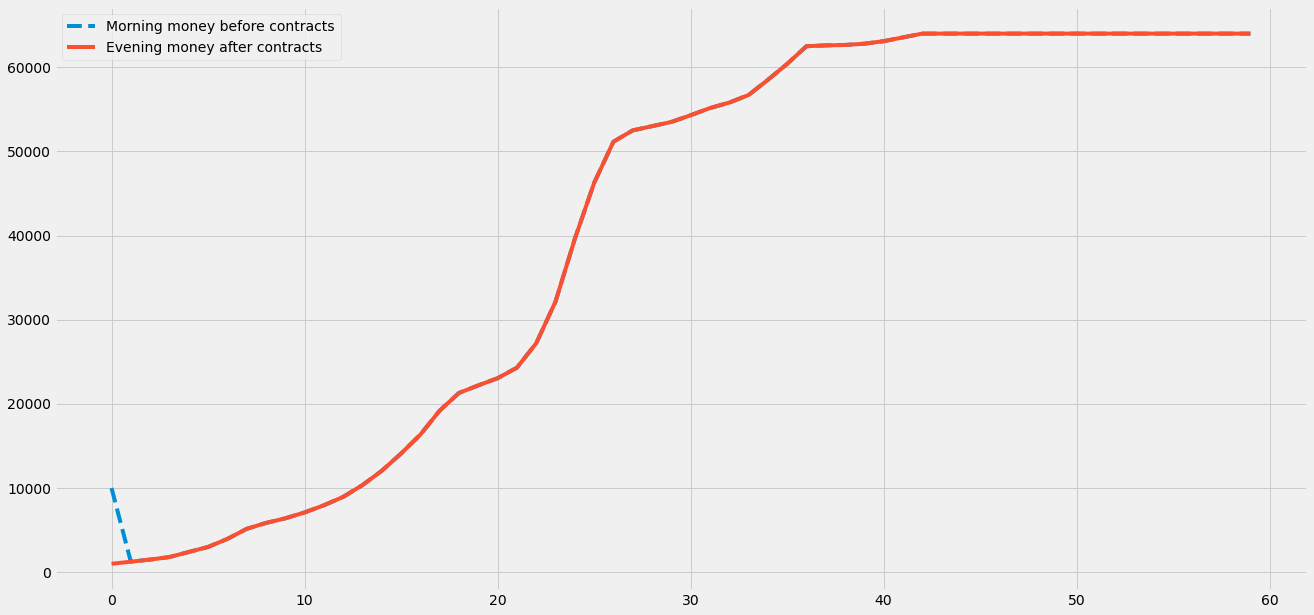

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(range(DAY_LIMIT), morning_money, linestyle="dashed", label="Morning money before contracts")
ax.plot(range(DAY_LIMIT), evening_money, label="Evening money after contracts")
plt.legend()
plt.draw()

In [123]:
history

defaultdict(list,
            {0: [387, 1782, 3706],
             1: [],
             2: [],
             3: [],
             4: [],
             5: [],
             6: [],
             7: [],
             8: [],
             9: [],
             10: [],
             11: [],
             12: [],
             13: [],
             14: [],
             15: [],
             16: [],
             17: [],
             18: [],
             19: [],
             20: [],
             21: [],
             22: [],
             23: [],
             24: [],
             25: [],
             26: [],
             27: [],
             28: [],
             29: [],
             30: [],
             31: [],
             32: [],
             33: [],
             34: [],
             35: [],
             36: [],
             37: [],
             38: [],
             39: [],
             40: [],
             41: [],
             42: [],
             43: [],
             44: [],
             45: [],
           

In [124]:
history_to_dump = {k: v for k, v in history.items() if len(v) > 0}

In [125]:
reverse_mapping = {v: k for k, v in mapping.items()}

In [126]:
for day in history_to_dump:
    history_to_dump[day] = list(map(lambda x: reverse_mapping[x], history_to_dump[day]))

In [127]:
history_to_dump

{0: [167, 3057, 3775]}

In [176]:
import json
import re

In [178]:
with open("./more_smart_baseline.txt", 'w') as f:
    json.dump(history_to_dump, f, ensure_ascii=True)

In [177]:
new_file = []
with open("./more_smart_baseline.txt", 'w') as f:
    for line in f:
        new_file.append(re.sub('"', '', line))
new_file = "\n".join(new_file)

UnsupportedOperation: not readable